In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')
df.shape

(3554, 18)

In [2]:
df.head()

property_type                 society      sector  price  price_per_sqft  \
0          flat  maa bhagwati residency    sector 7   0.45          5000.0   
1          flat            apna enclave    sector 3   0.50          7692.0   
2          flat  tulsiani easy in homes  sohna road   0.40          6723.0   
3          flat     smart world orchard   sector 61   1.47         12250.0   
4          flat        parkwood westend   sector 92   0.70          5204.0   

   bedRoom  bathroom balcony  floorNum       agePossession  built_up_area  \
0        2         2       1       4.0      Relatively New          814.0   
1        2         2       1       1.0        Old Property          588.0   
2        2         2       3      12.0        New Property          538.0   
3        2         2       2       2.0        New Property         1086.0   
4        2         2       3       5.0  Under Construction         1217.0   

   study room  servant room  store room  pooja room  others  furnishing_type  \
0           0             0           0           0       0                1   
1           0             0           0           0       0                0   
2           0             0           0           0       0                1   
3           1             0           0           0       0                1   
4           1             0           0           0       0                1   

   luxury_score  
0            28  
1            37  
2            36  
3            76  
4             0

In [3]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [4]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony  floorNum  \
0          flat    sector 7   0.45        2         2       1       4.0   
1          flat    sector 3   0.50        2         2       1       1.0   
2          flat  sohna road   0.40        2         2       3      12.0   
3          flat   sector 61   1.47        2         2       2       2.0   
4          flat   sector 92   0.70        2         2       3       5.0   

        agePossession  built_up_area  study room  servant room  store room  \
0      Relatively New          814.0           0             0           0   
1        Old Property          588.0           0             0           0   
2        New Property          538.0           0             0           0   
3        New Property         1086.0           1             0           0   
4  Under Construction         1217.0           1             0           0   

   pooja room  others  furnishing_type  luxury_score  
0           0       0                1            28  
1           0       0                0            37  
2           0       0                1            36  
3           0       0                1            76  
4           0       0                1             0

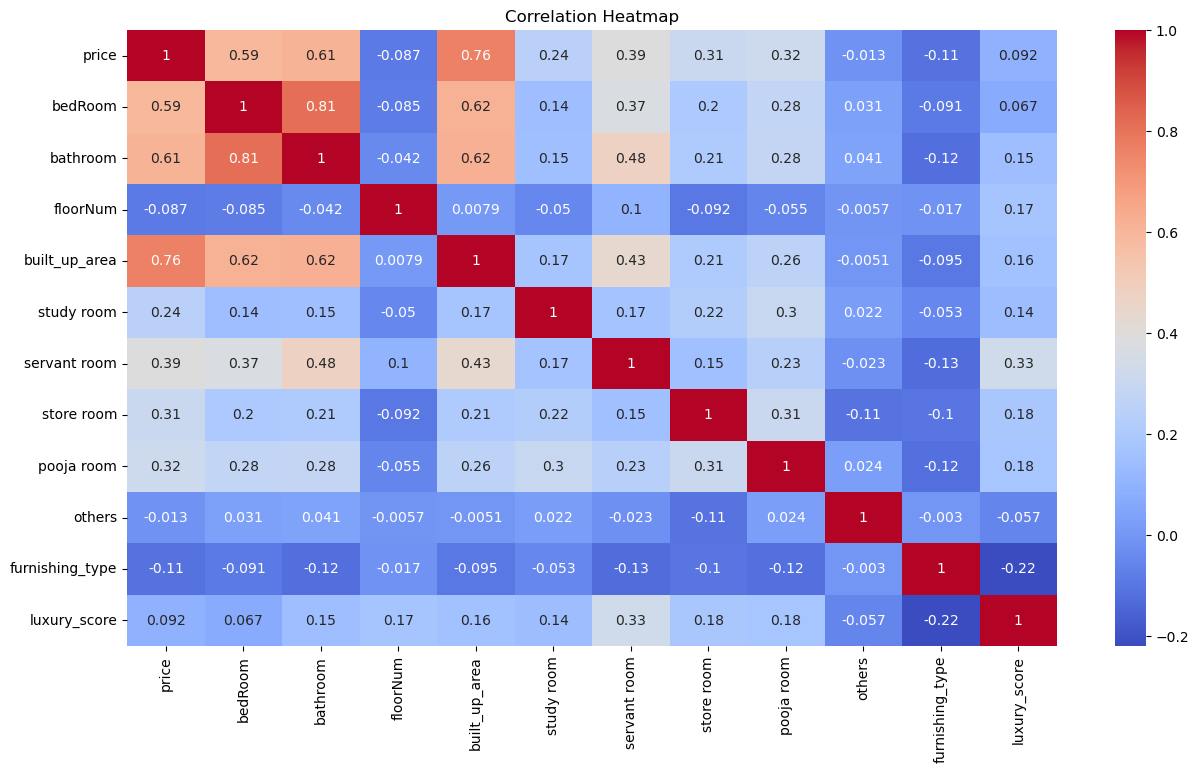

In [5]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
train_df.select_dtypes(include='number').corr()['price'].sort_values(ascending= False)

price              1.000000
built_up_area      0.761897
bathroom           0.609913
bedRoom            0.591470
servant room       0.391984
pooja room         0.319881
store room         0.305692
study room         0.242989
luxury_score       0.091600
others            -0.013030
floorNum          -0.087379
furnishing_type   -0.112263
Name: price, dtype: float64

<Axes: ylabel='luxury_score'>

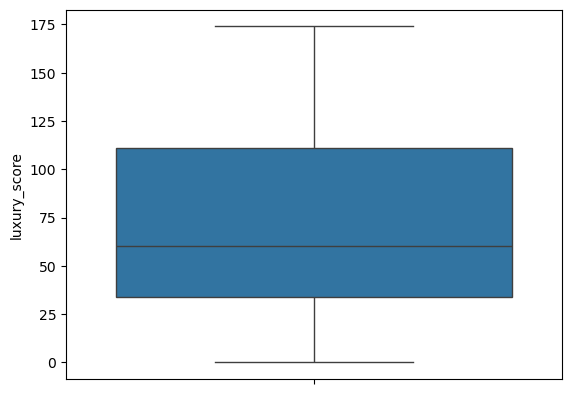

In [7]:
sns.boxplot(train_df['luxury_score'])

In [8]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return 'Low'
    elif 50 <= score < 150:
        return 'Medium'
    elif 150 <= score < 175:
        return 'High'
    else: 
        return None

In [9]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [10]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony  floorNum  \
0          flat    sector 7   0.45        2         2       1       4.0   
1          flat    sector 3   0.50        2         2       1       1.0   
2          flat  sohna road   0.40        2         2       3      12.0   
3          flat   sector 61   1.47        2         2       2       2.0   
4          flat   sector 92   0.70        2         2       3       5.0   

        agePossession  built_up_area  study room  servant room  store room  \
0      Relatively New          814.0           0             0           0   
1        Old Property          588.0           0             0           0   
2        New Property          538.0           0             0           0   
3        New Property         1086.0           1             0           0   
4  Under Construction         1217.0           1             0           0   

   pooja room  others  furnishing_type  luxury_score luxury_category  
0           0       0                1            28             Low  
1           0       0                0            37             Low  
2           0       0                1            36             Low  
3           0       0                1            76          Medium  
4           0       0                1             0             Low

<Axes: ylabel='floorNum'>

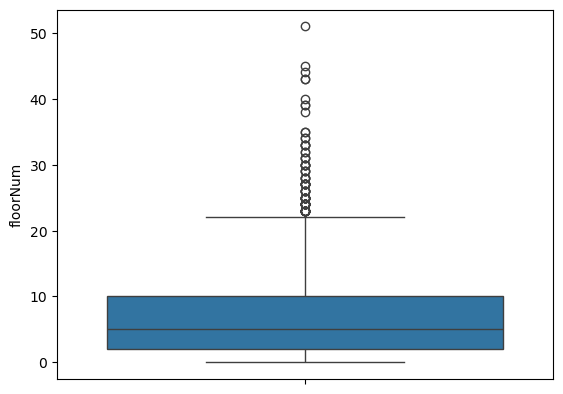

In [11]:
sns.boxplot(df['floorNum'])

In [12]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None

In [13]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [14]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony  floorNum  \
0          flat    sector 7   0.45        2         2       1       4.0   
1          flat    sector 3   0.50        2         2       1       1.0   
2          flat  sohna road   0.40        2         2       3      12.0   
3          flat   sector 61   1.47        2         2       2       2.0   
4          flat   sector 92   0.70        2         2       3       5.0   

        agePossession  built_up_area  study room  servant room  store room  \
0      Relatively New          814.0           0             0           0   
1        Old Property          588.0           0             0           0   
2        New Property          538.0           0             0           0   
3        New Property         1086.0           1             0           0   
4  Under Construction         1217.0           1             0           0   

   pooja room  others  furnishing_type  luxury_score luxury_category  \
0           0       0                1            28             Low   
1           0       0                0            37             Low   
2           0       0                1            36             Low   
3           0       0                1            76          Medium   
4           0       0                1             0             Low   

  floor_category  
0      Mid Floor  
1      Low Floor  
2     High Floor  
3      Low Floor  
4      Mid Floor

In [15]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [16]:
from sklearn.preprocessing import OrdinalEncoder

data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)
    
x_label = data_label_encoded.drop('price',axis = 1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['sector 1', 'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 55',
       'sector 56', 'sector 57', 'sector 58', 'sector 59', 'sector 6',
       'sector 60', 'sector 61', 'sector 62', 'sector 63', 'sector 65',
       'sector 66', 'sector 67', 'sector 6

In [17]:
data_label_encoded.head()

property_type  sector  price  bedRoom  bathroom  balcony  agePossession  \
0            0.0    67.0   0.45        2         2      1.0            3.0   
1            0.0    29.0   0.50        2         2      1.0            2.0   
2            0.0    96.0   0.40        2         2      3.0            1.0   
3            0.0    59.0   1.47        2         2      2.0            1.0   
4            0.0    92.0   0.70        2         2      3.0            4.0   

   built_up_area  study room  servant room  store room  pooja room  others  \
0          814.0           0             0           0           0       0   
1          588.0           0             0           0           0       0   
2          538.0           0             0           0           0       0   
3         1086.0           1             0           0           0       0   
4         1217.0           1             0           0           0       0   

   furnishing_type  luxury_category  floor_category  
0                1              1.0             2.0  
1                0              1.0             1.0  
2                1              1.0             0.0  
3                1              2.0             1.0  
4                1              1.0             2.0

In [18]:
x_label

property_type  sector  bedRoom  bathroom  balcony  agePossession  \
0               0.0    67.0        2         2      1.0            3.0   
1               0.0    29.0        2         2      1.0            2.0   
2               0.0    96.0        2         2      3.0            1.0   
3               0.0    59.0        2         2      2.0            1.0   
4               0.0    92.0        2         2      3.0            4.0   
...             ...     ...      ...       ...      ...            ...   
3549            1.0    54.0        3         3      3.0            0.0   
3550            1.0    26.0        4         4      3.0            0.0   
3551            1.0    25.0        3         2      3.0            2.0   
3552            1.0    26.0        3         3      2.0            0.0   
3553            1.0    26.0        3         3      3.0            2.0   

      built_up_area  study room  servant room  store room  pooja room  others  \
0             814.0           0             0           0           0       0   
1             588.0           0             0           0           0       0   
2             538.0           0             0           0           0       0   
3            1086.0           1             0           0           0       0   
4            1217.0           1             0           0           0       0   
...             ...         ...           ...         ...         ...     ...   
3549         1650.0           0             0           1           0       0   
3550         1800.0           1             1           0           1       0   
3551         1350.0           1             0           0           0       0   
3552         1350.0           1             1           0           0       0   
3553         8829.0           1             0           0           0       0   

      furnishing_type  luxury_category  floor_category  
0                   1              1.0             2.0  
1                   0              1.0             1.0  
2                   1              1.0             0.0  
3                   1              2.0             1.0  
4                   1              1.0             2.0  
...               ...              ...             ...  
3549                0              2.0             1.0  
3550                1              2.0             1.0  
3551                1              1.0             1.0  
3552                1              2.0             1.0  
3553                1              2.0             1.0  

[3554 rows x 15 columns]

In [19]:
y_label

0       0.45
1       0.50
2       0.40
3       1.47
4       0.70
        ... 
3549    4.75
3550    5.50
3551    4.25
3552    4.50
3553    3.25
Name: price, Length: 3554, dtype: float64

<Axes: >

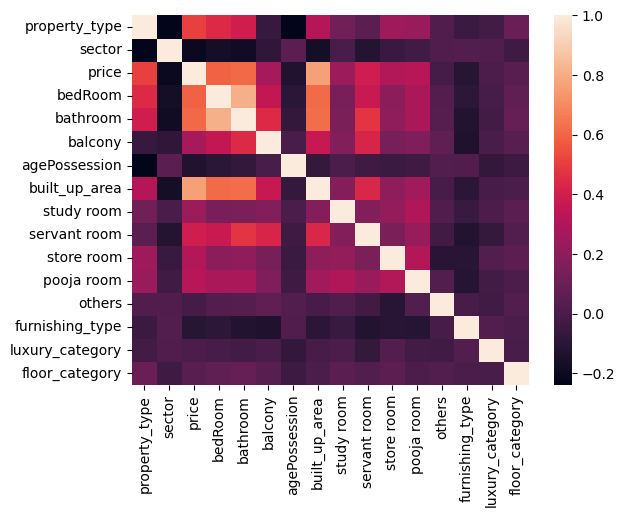

In [20]:
# correlation Analysis 
sns.heatmap(data_label_encoded.corr())

In [22]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

feature  corr_coeff
0            sector   -0.206977
1             price    1.000000
2           bedRoom    0.591470
3          bathroom    0.609913
4           balcony    0.269876
5     agePossession   -0.129592
6     built_up_area    0.761897
7        study room    0.242989
8      servant room    0.391984
9        store room    0.305692
10       pooja room    0.319881
11           others   -0.013030
12  furnishing_type   -0.112263
13  luxury_category    0.009826
14   floor_category    0.042776

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100 , random_state = 42)
rf.fit(x_label,y_label)

fi_df2 = pd.DataFrame({
    'feature' : x_label.columns,
    'rf_importance': rf.feature_importances_
}).sort_values(by='rf_importance', ascending = False)

fi_df2

feature  rf_importance
6     built_up_area       0.666396
1            sector       0.099083
0     property_type       0.090231
3          bathroom       0.025200
2           bedRoom       0.025145
8      servant room       0.017342
5     agePossession       0.014094
4           balcony       0.012796
12  furnishing_type       0.009657
7        study room       0.009249
9        store room       0.008241
13  luxury_category       0.007359
14   floor_category       0.006333
10       pooja room       0.006121
11           others       0.002754

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(x_label,y_label)

fi_df3 = pd.DataFrame({
    'feature':x_label.columns,
    'gb_importance':gb.feature_importances_
}).sort_values(by='gb_importance',ascending = False)

fi_df3

feature  gb_importance
6     built_up_area       0.706305
1            sector       0.093514
0     property_type       0.089819
2           bedRoom       0.035134
3          bathroom       0.030693
8      servant room       0.022263
9        store room       0.010472
5     agePossession       0.004228
12  furnishing_type       0.002380
7        study room       0.002204
4           balcony       0.001595
13  luxury_category       0.000755
14   floor_category       0.000257
11           others       0.000246
10       pooja room       0.000137

In [40]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

x_train_label,x_test_label,y_train_label,y_test_label = train_test_split(x_label,y_label , test_size = .2, random_state = 42)

rf = RandomForestRegressor(n_estimators = 100 , random_state = 42)
rf.fit(x_train_label,y_train_label)

perm_importance = permutation_importance(rf , x_test_label, y_test_label, n_repeats = 30 , random_state = 42)

fi_df4 = pd.DataFrame({
    'feature':x_label.columns,
    'permutation_importances':perm_importance.importances_mean
}).sort_values(by = 'permutation_importances', ascending = False)

fi_df4

feature  permutation_importances
6     built_up_area                 0.767567
0     property_type                 0.150716
1            sector                 0.135583
3          bathroom                 0.026143
8      servant room                 0.020002
2           bedRoom                 0.016508
4           balcony                 0.003364
7        study room                 0.002920
13  luxury_category                 0.001314
14   floor_category                 0.000670
11           others                -0.000464
5     agePossession                -0.001109
9        store room                -0.001538
10       pooja room                -0.002791
12  furnishing_type                -0.005958

In [41]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_label)

lasso = Lasso(alpha = .01 , random_state = 42)
lasso.fit(x_scaled, y_label)

fi_df5 = pd.DataFrame({
    'feature': x_label.columns,
    'lasso_coef': lasso.coef_
}).sort_values(by='lasso_coef', ascending = False)

fi_df5

feature  lasso_coef
6     built_up_area    1.561834
0     property_type    0.657518
3          bathroom    0.284233
9        store room    0.200004
7        study room    0.180156
8      servant room    0.159074
10       pooja room    0.089767
13  luxury_category    0.045378
2           bedRoom    0.007485
14   floor_category   -0.000000
11           others   -0.016608
12  furnishing_type   -0.032588
5     agePossession   -0.041461
4           balcony   -0.051020
1            sector   -0.059231